### **Objective**

Predicting energy budget of a building for any given month

Given parameters: 
- Weather data of 3 years
- Energy consumption record of 3 years
- Energy cost of a month

Target is to predict the energy demand of the building as a whole for any given month


In [9]:
#import pandas, numpy for data analytics and manipulation
#import matplotlib for visualisation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the building power consumption data

In [24]:
Energytarp = pd.read_excel(r"C:\Users\hrish\Desktop\tarp\Building energy consumption racord.xlsx")
Energytarp

,Time,building power
0,2016-01-01 01:00:00,23.783228
1,2016-01-01 02:00:00,23.783228
2,2016-01-01 03:00:00,23.783228
3,2016-01-01 04:00:00,23.783228
4,2016-01-01 05:00:00,23.783228
...,...,...
26298,2018-12-31 19:00:00,18.602723
26299,2018-12-31 20:00:00,18.838200
26300,2018-12-31 21:00:00,18.602723
26301,2018-12-31 22:00:00,18.131768


In [23]:
# set time column as index
Energy = Energytarp.set_index('Time')
Energy

,building power
Time,
2016-01-01 01:00:00,23.783228
2016-01-01 02:00:00,23.783228
2016-01-01 03:00:00,23.783228
2016-01-01 04:00:00,23.783228
2016-01-01 05:00:00,23.783228
...,...
2018-12-31 19:00:00,18.602723
2018-12-31 20:00:00,18.838200
2018-12-31 21:00:00,18.602723


In [15]:
# Check the description of the data
energy.describe()

,building power
count,26303.000000
mean,25.694969
std,6.317738
min,15.541515
25%,20.957498
50%,23.783228
75%,28.728255
max,59.340330


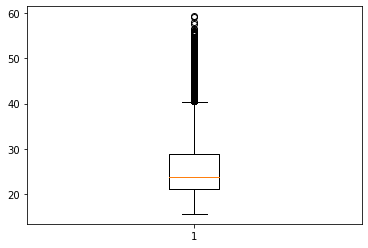

In [16]:
#boxplot visualisation
plt.boxplot(Energy['building power'])
plt.show()

C:\Users\hrish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='building power'>

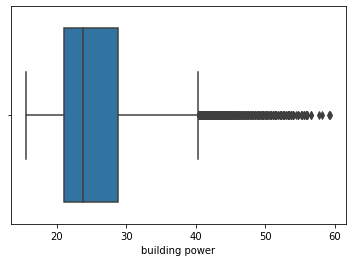

In [17]:
# visual representation of the data description

import seaborn as sns
sns.boxplot(energy['building power'])

### Load Weather data of 3 years

In [19]:
Path= "C:/Users/hrish/Desktop/tarp/WeatherData.xlsx"
weather= pd.read_excel(Path)
weather

,Time,month,HH,TD,U,Temp,RH,Q,DR,FF,FX,P
0,2016-01-01 01:00:00,1,1,38,82,6.6,0.82,0,0,30,70,10224
1,2016-01-01 02:00:00,1,2,43,83,7.0,0.83,0,0,40,80,10228
2,2016-01-01 03:00:00,1,3,46,91,5.9,0.91,0,0,30,80,10232
3,2016-01-01 04:00:00,1,4,36,96,4.2,0.96,0,0,20,40,10237
4,2016-01-01 05:00:00,1,5,37,98,4.0,0.98,0,0,20,30,10240
...,...,...,...,...,...,...,...,...,...,...,...,...
26298,2018-12-31 19:00:00,12,19,78,93,8.7,0.93,0,0,30,60,10341
26299,2018-12-31 20:00:00,12,20,74,92,8.5,0.92,0,0,30,50,10338
26300,2018-12-31 21:00:00,12,21,66,89,8.2,0.89,0,0,40,60,10336
26301,2018-12-31 22:00:00,12,22,68,94,7.6,0.94,0,0,40,70,10332


In [20]:
#Set the Time column as index
weather = weather.set_index("Time")
weather

,month,HH,TD,U,Temp,RH,Q,DR,FF,FX,P
Time,,,,,,,,,,,
2016-01-01 01:00:00,1,1,38,82,6.6,0.82,0,0,30,70,10224
2016-01-01 02:00:00,1,2,43,83,7.0,0.83,0,0,40,80,10228
2016-01-01 03:00:00,1,3,46,91,5.9,0.91,0,0,30,80,10232
2016-01-01 04:00:00,1,4,36,96,4.2,0.96,0,0,20,40,10237
2016-01-01 05:00:00,1,5,37,98,4.0,0.98,0,0,20,30,10240
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,12,19,78,93,8.7,0.93,0,0,30,60,10341
2018-12-31 20:00:00,12,20,74,92,8.5,0.92,0,0,30,50,10338
2018-12-31 21:00:00,12,21,66,89,8.2,0.89,0,0,40,60,10336


In [26]:
#combine the datasets of weather and electricity consumption
data1 = pd.concat([weather, Energy], axis=1)
data1

,month,HH,TD,U,Temp,RH,Q,DR,FF,FX,P,building power
Time,,,,,,,,,,,,
2016-01-01 01:00:00,1,1,38,82,6.6,0.82,0,0,30,70,10224,23.783228
2016-01-01 02:00:00,1,2,43,83,7.0,0.83,0,0,40,80,10228,23.783228
2016-01-01 03:00:00,1,3,46,91,5.9,0.91,0,0,30,80,10232,23.783228
2016-01-01 04:00:00,1,4,36,96,4.2,0.96,0,0,20,40,10237,23.783228
2016-01-01 05:00:00,1,5,37,98,4.0,0.98,0,0,20,30,10240,23.783228
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,12,19,78,93,8.7,0.93,0,0,30,60,10341,18.602723
2018-12-31 20:00:00,12,20,74,92,8.5,0.92,0,0,30,50,10338,18.838200
2018-12-31 21:00:00,12,21,66,89,8.2,0.89,0,0,40,60,10336,18.602723


In [27]:
# check for missing data
data1.isna().sum()

month             0
HH                0
TD                0
U                 0
Temp              0
RH                0
Q                 0
DR                0
FF                0
FX                0
P                 0
building power    0
dtype: int64

### Plotting a Heatmap

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'month'),
  Text(1.5, 0, 'HH'),
  Text(2.5, 0, 'TD'),
  Text(3.5, 0, 'U'),
  Text(4.5, 0, 'Temp'),
  Text(5.5, 0, 'RH'),
  Text(6.5, 0, 'Q'),
  Text(7.5, 0, 'DR'),
  Text(8.5, 0, 'FF'),
  Text(9.5, 0, 'FX'),
  Text(10.5, 0, 'P'),
  Text(11.5, 0, 'building power')])

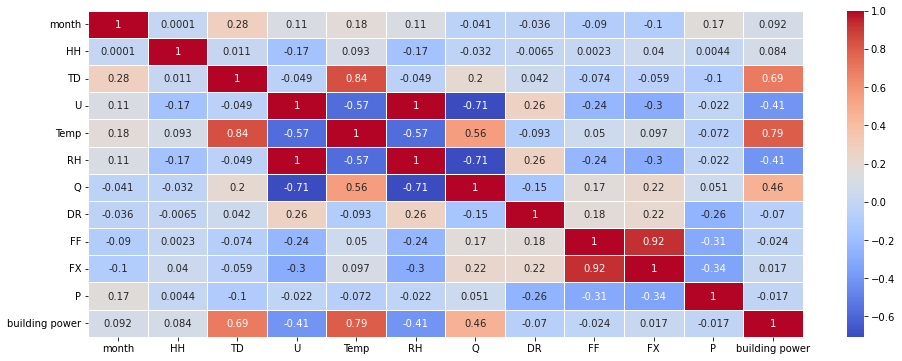

In [28]:
# Create matplotlib figure
plt.figure(figsize = (16,6)) 
sns.heatmap(data1.corr(), annot = True, linewidths=1, fmt=".2g", cmap= 'coolwarm') 
plt.xticks(rotation='horizontal')

###### Inference: 
Temperature correlates very positively with building electricity demand. 

Relative humidity (U) and hourly sum of precipitation (RH) are two highest negatively correlated features. 

Either of them can be utilized for predicting electricity demand. 

#plot energy consumption data against U and Temp

In [30]:
# Resample the energy of the building over a week using the resmaple function and the mean  function. 
data1_sum_weekly = data1['building power'].resample('W').mean()

# Resample the temperature over a week. 
data1_feature1= data1["Temp"].resample("W").mean()

# Resample the relative humidity over a week. 
data1_feature2 = data1["U"].resample("W").mean()

C:\Users\hrish\AppData\Local\Temp/ipykernel_4572/2937729751.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


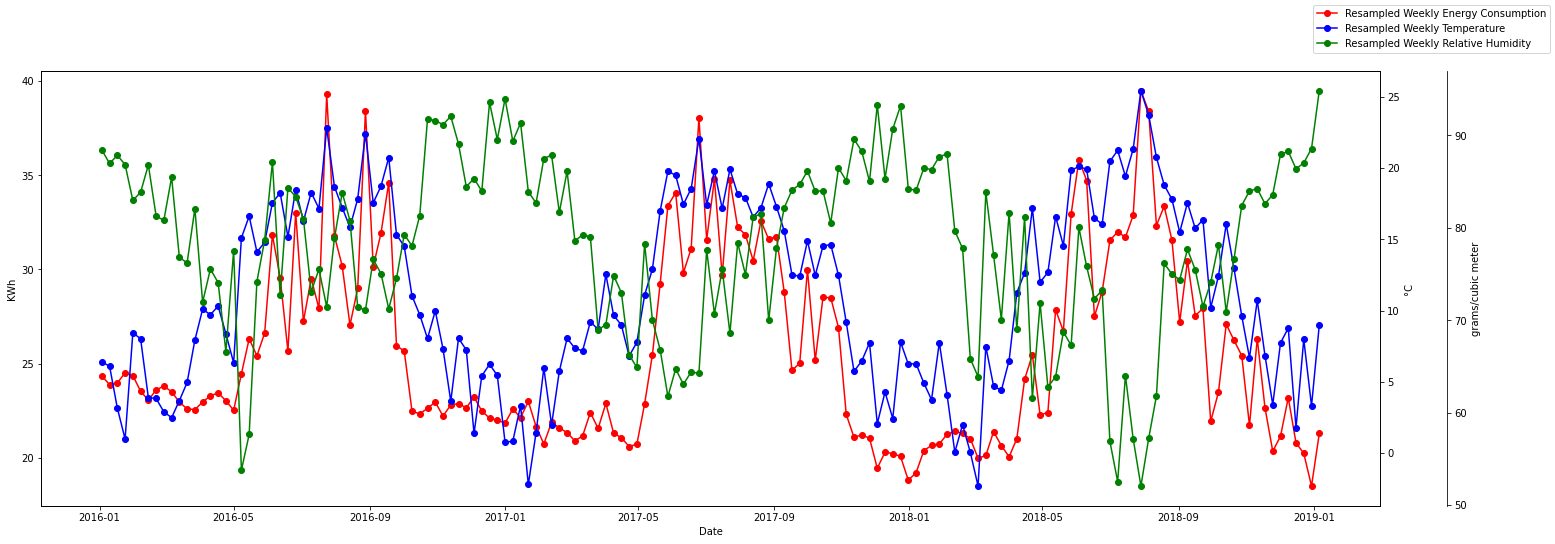

In [31]:
# plot the result
fig,ax = plt.subplots(figsize=(24,8))  
ax.plot(data1_sum_weekly.index, data1_sum_weekly, color="red",marker="o")
ax.set_ylabel("KWh")
ax.set_xlabel('Date')
ax2 = ax.twinx() #new axis
ax3 = ax.twinx()
ax2.plot(data1_sum_weekly.index, data1_feature1, color="blue", marker="o")
ax2.set_ylabel("°C")
ax3.plot(data1_sum_weekly.index, data1_feature2, color="green", marker="o")
ax3.set_ylabel("grams/cubic meter")
ax3.spines["right"].set_position(("axes", 1.05))
fig.legend(["Resampled Weekly Energy Consumption","Resampled Weekly Temperature","Resampled Weekly Relative Humidity"], loc='upper right')
fig.show()

### Feature Selection


In [34]:
# calculate the spearmans's correlation between two variables
from scipy.stats import spearmanr

#filter columns from dataframe
energy = np.array(data1["building power"]) 
hour = np.array(data1["HH"])
month= np.array(data1["month"])

# calculate spearman's correlation
corr1, _ = spearmanr(energy, hour)
corr2,_ = spearmanr(energy, month)
print('Spearmans correlation between Energy and hour feature: %.3f' % corr1)
print('Spearmans correlation between Energy and month feature: %.3f' % corr2)

Spearmans correlation between Energy and hour feature: 0.068
Spearmans correlation between Energy and month feature: 0.077


In [35]:
#Reduce number of features with lower correlation values .
weather_updated= weather.loc[:, ~weather.columns.isin(["TD","U","DR","FX"])] #dropping the columns
weather_updated

,month,HH,Temp,RH,Q,FF,P
Time,,,,,,,
2016-01-01 01:00:00,1,1,6.6,0.82,0,30,10224
2016-01-01 02:00:00,1,2,7.0,0.83,0,40,10228
2016-01-01 03:00:00,1,3,5.9,0.91,0,30,10232
2016-01-01 04:00:00,1,4,4.2,0.96,0,20,10237
2016-01-01 05:00:00,1,5,4.0,0.98,0,20,10240
...,...,...,...,...,...,...,...
2018-12-31 19:00:00,12,19,8.7,0.93,0,30,10341
2018-12-31 20:00:00,12,20,8.5,0.92,0,30,10338
2018-12-31 21:00:00,12,21,8.2,0.89,0,40,10336


### ML regression model for prediction


In [36]:
#Splitting the data into training (80%) and testing (20%) set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(weather_updated, Energy, test_size = 0.2, random_state = 0)
y_train

,building power
Time,
2016-11-29 03:00:00,22.370362
2018-01-29 11:00:00,24.725137
2018-07-03 20:00:00,36.028058
2017-09-05 16:00:00,44.034292
2017-03-08 06:00:00,19.309155
...,...
2017-06-30 20:00:00,29.434687
2018-03-29 17:00:00,21.899408
2017-02-14 06:00:00,21.192975


In [37]:
y_train = y_train.values.ravel() #ravel is a numpy function to change a 2-dimensional array or a multi-dimensional array into a continuous flattened array.
y_train


array([22.3703625, 24.7251375, 36.0280575, ..., 21.192975 , 19.5446325,
       20.72202  ])

In [38]:
y_test = y_test.values.ravel()
y_test


array([19.5446325, 32.2604175, 20.0155875, ..., 20.72202  , 28.4927775,
       25.1960925])

In [39]:
# importing regression model 
from sklearn.svm import SVR

#Creating an instance or object of the support vector machine regressor class
SVReg = SVR(kernel= 'rbf') 

# fitting the regression model to the training dataset
SVReg.fit(X_train, y_train) #Fit the SVM model according to the given training data.

SVR()

In [40]:
# predicting on the training data
Predicted_Train= SVReg.predict(X_train)
Predicted_Train

array([23.33747534, 23.52037698, 23.57941113, ..., 23.3715236 ,
       23.38476265, 23.42220531])

In [41]:
# To evaluate the performance of the model, importing error metrics function
from sklearn.metrics import r2_score #(coefficient of determination) regression score function.
from sklearn.metrics import mean_squared_error #The MSE indicates the average distance of the best fit regression line to the observed values.

print(r2_score(y_train,Predicted_Train))
print(mean_squared_error(y_train,Predicted_Train))

0.01964854734223298
39.16973198670731


In [42]:
# Import the required packages
from sklearn.preprocessing import StandardScaler #standardizes the data to a range in which the mean is equal to 0 and the standard deviation is 1. It assumes the data is normally distributed.
from sklearn.preprocessing import MinMaxScaler #normalizes the data and brings the values between 0 (lowest value) and 1 (highest value)
from sklearn.preprocessing import RobustScaler #standardizes the data. But is more robust to outliers because it only scales the data according to the Interquartile Range (IQR) between the 1st and 3rd quartile.

#Generate the scaler
sc1= StandardScaler()
sc2= MinMaxScaler()
sc3= RobustScaler()

In [44]:
#Scaling the input data
X1 = sc1.fit_transform(weather_updated)
X2 = sc2.fit_transform(weather_updated)
X3 = sc3.fit_transform(weather_updated)

#We do not need to scale the output data as we have only one output.

## scaled values

In [69]:
#standard scaling
df1 = pd.DataFrame(X1)
print(df1)

              0         1         2         3        4         5         6
0     -1.601129 -1.661317 -0.626228  0.234380 -0.62703 -0.286053  0.656696
1     -1.601129 -1.516849 -0.572810  0.292123 -0.62703  0.193675  0.698599
2     -1.601129 -1.372381 -0.719710  0.754067 -0.62703 -0.286053  0.740503
3     -1.601129 -1.227914 -0.946736  1.042783 -0.62703 -0.765781  0.792882
4     -1.601129 -1.083446 -0.973445  1.158269 -0.62703 -0.765781  0.824309
...         ...       ...       ...       ...      ...       ...       ...
26298  1.588309  0.939104 -0.345784  0.869554 -0.62703 -0.286053  1.882365
26299  1.588309  1.083572 -0.372493  0.811811 -0.62703 -0.286053  1.850938
26300  1.588309  1.228040 -0.412556  0.638581 -0.62703  0.193675  1.829986
26301  1.588309  1.372508 -0.492683  0.927297 -0.62703  0.193675  1.788083
26302  1.588309  1.516976 -0.492683  0.927297 -0.62703  0.193675  1.798559

[26303 rows x 7 columns]


In [70]:
#minmax scaling
df2 = pd.DataFrame(X2)
print(df2)

         0         1         2         3    4         5         6
0      0.0  0.000000  0.352052  0.793103  0.0  0.166667  0.685408
1      0.0  0.043478  0.360691  0.804598  0.0  0.222222  0.690763
2      0.0  0.086957  0.336933  0.896552  0.0  0.166667  0.696118
3      0.0  0.130435  0.300216  0.954023  0.0  0.111111  0.702811
4      0.0  0.173913  0.295896  0.977011  0.0  0.111111  0.706827
...    ...       ...       ...       ...  ...       ...       ...
26298  1.0  0.782609  0.397408  0.919540  0.0  0.166667  0.842035
26299  1.0  0.826087  0.393089  0.908046  0.0  0.166667  0.838019
26300  1.0  0.869565  0.386609  0.873563  0.0  0.222222  0.835341
26301  1.0  0.913043  0.373650  0.931034  0.0  0.222222  0.829987
26302  1.0  0.956522  0.373650  0.931034  0.0  0.222222  0.831325

[26303 rows x 7 columns]


C:\Users\hrish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hrish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hrish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

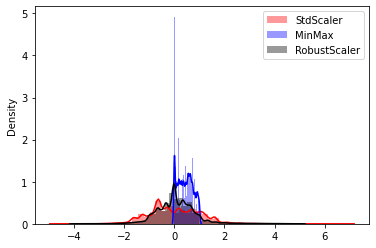

In [45]:
#plotting to visually explore the scaled features
sns.distplot(X1,color="red",label="StdScaler")
sns.distplot(X2,color="blue",label="MinMax")
sns.distplot(X3,color="black",label="RobustScaler")
plt.legend()

In [46]:
#Split your data set into training (80%) and test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X1, Energy, test_size=0.2, random_state=0, shuffle= "False")
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [47]:
#building the regressor and fit the training data to the regressor
regr = SVR(kernel='rbf')
regr= regr.fit(X_train, y_train)
regr

SVR()

In [49]:
# fitting the regression model to the training data
regr.fit(X_train, y_train) #Fit the SVM model according to the given training data.
# predicting on the training data
predict_train= regr.predict(X_train)

### Mean Square Error

In [51]:
#testing the model training accuracy 
print(r2_score(y_train, predict_train))
print(mean_squared_error(y_train, predict_train))

0.8676607662388549
5.287585695616702


In [52]:
#Predicting on the test data
pred= regr.predict(X_test)
##testing the models accuracy on the test data
print(r2_score(y_test, pred))
print(mean_squared_error(y_test, pred))

0.8650113986197081
5.364047670294077


###### Min max scaling 

In [64]:
#Split your data set into training (80%) and test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X2, Energy, test_size=0.2, random_state=0, shuffle= "False")
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

#building the regressor and fit the training data to the regressor
regr = SVR(kernel='rbf')
regr= regr.fit(X_train, y_train)

# fitting the regression model to the training data
regr.fit(X_train, y_train) #Fit the SVM model according to the given training data.
# predicting on the training data
predict_train= regr.predict(X_train)

#testing the model training accuracy 
print(r2_score(y_train, predict_train))
print(mean_squared_error(y_train, predict_train))
print(y_test)

0.8543589078950262
5.81905859224003
[19.5446325 32.2604175 20.0155875 ... 20.72202   28.4927775 25.1960925]


In [54]:
#Predicting on the test data
pred= regr.predict(X_test)
##testing the models accuracy on the test data
print(r2_score(y_test, pred))
print(mean_squared_error(y_test, pred))
print(pred)

0.8514063183174979
5.904673312407655
[20.89183288 32.84058478 22.49658327 ... 23.62596347 28.11352214
 28.09902637]


###### Robust Scaling

In [55]:
#Split your data set into training (80%) and test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X3, Energy, test_size=0.2, random_state=0, shuffle= "False")
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

#building the regressor and fit the training data to the regressor
regr = SVR(kernel='rbf')
regr= regr.fit(X_train, y_train)

# fitting the regression model to the training data
regr.fit(X_train, y_train) #Fit the SVM model according to the given training data.
# predicting on the training data
predict_train= regr.predict(X_train)

#testing the model training accuracy 
print(r2_score(y_train, predict_train))
print(mean_squared_error(y_train, predict_train))

0.861376711378752
5.538663759501534


In [56]:
#Predicting on the test data
pred= regr.predict(X_test)
##testing the models accuracy on the test data
print(r2_score(y_test, pred))
print(mean_squared_error(y_test, pred))
print(pred)

0.8581322813412404
5.637403439847457
[20.44905434 33.23566983 21.80781614 ... 23.30290928 28.16273354
 27.65906577]


In [57]:
#Split your data set into training (80%) and test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X1, Energy, test_size=0.2, random_state=0, shuffle= "False")
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

#building the regressor and fit the training data to the regressor
regr = SVR(kernel='poly', degree=5) # y = ax5 + bx4 + cx3 + dx2 + ex + f

# fitting the regression model to the training data
regr.fit(X_train, y_train) #Fit the SVM model according to the given training data.
# predicting on the training data
predict_train= regr.predict(X_train)

#testing the model training accuracy 
print(r2_score(y_train, predict_train))
print(mean_squared_error(y_train, predict_train))

0.6243431637453998
15.009288306939203


In [59]:
X4 = sc1.fit_transform(weather.loc[:, ~weather.columns.isin(["U"])])


In [60]:
#We redefine the data for standard scaling and split into training (80%) and test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X4, Energy, test_size=0.2, random_state=0, shuffle= "False")
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

#building the regressor and fit the training data to the regressor
regr = SVR(kernel='rbf')
regr= regr.fit(X_train, y_train)

# fitting the regression model to the training data
regr.fit(X_train, y_train) #Fit the SVM model according to the given training data.
# predicting on the training data
predict_train= regr.predict(X_train)

#testing the model training accuracy 
print(r2_score(y_train, predict_train))
print(mean_squared_error(y_train, predict_train))

0.8692363907335192
5.2246319569341315


In [61]:
#Predicting on the test data
pred= regr.predict(X_test)
##testing the models accuracy on the test data
print(r2_score(y_test, pred))
print(mean_squared_error(y_test, pred))

0.865643553596894
5.338927701659935


Text(0, 0.5, 'kWh')

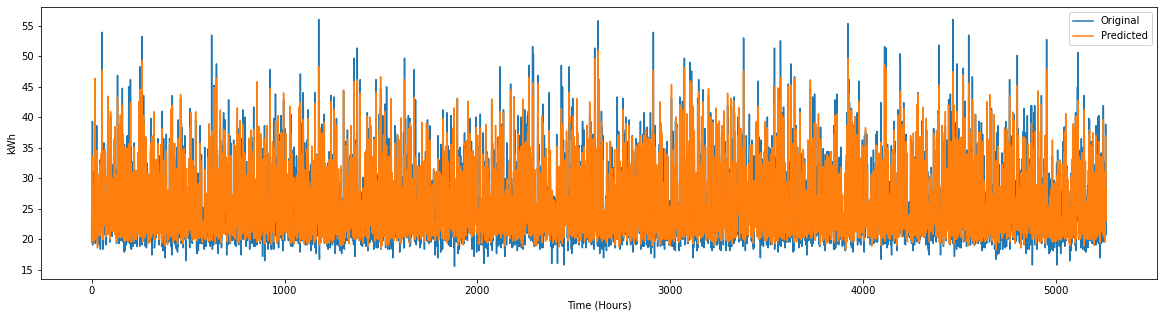

In [62]:
plt.figure(figsize = (20,5))
plt.plot(y_test, label="Original")
plt.plot(pred, label="Predicted")
plt.legend(loc='best')
plt.xlabel('Time (Hours)')
plt.ylabel('kWh')